In [1]:
# imports
import pandas as pd

In [2]:
# read in the dataframe
url = 'https://raw.githubusercontent.com/joa24jm/21-12-13_air-qual/master/data/01_raw/AirQualityUCI.csv'
df = pd.read_csv(url, sep=';', decimal=',')

In [3]:
# Remove columns that only contains NaN/None/Null-values
df.dropna(axis = "columns", how = "all", inplace = True)

In [4]:
df["Date"] = df["Date"] + " "+ df["Time"]
df.drop(columns= ["Time"], inplace = True)
df["Date"] = pd.to_datetime(df["Date"], format = "%d/%m/%Y %H.%M.%S")


In [5]:
df.rename(columns = {"CO(GT)" : "CO_GT", "PT08.S1(CO)": "PT08_S1_CO", "NMHC(GT)": "NMHC_GT", "C6H6(GT)": "C6H6_GT", "PT08.S2(NMHC)": "PT08_S2_NMHC","NOx(GT)":"NOx_GT","PT08.S3(NOx)": "PT08_S3_NOx", "NO2(GT)": "NO2_GT", "PT08.S4(NO2)": "PT08_S4_NO2", "PT08.S5(O3)": "PT08_S5_O3"}, inplace = True)

In [6]:
df.columns = [x.lower() for x in df.columns]

In [7]:
df.drop(df[df.ah == -200].index).isin([-200]).sum(axis=0)

date               0
co_gt           1619
pt08_s1_co         0
nmhc_gt         6822
c6h6_gt            0
pt08_s2_nmhc       0
nox_gt          1563
pt08_s3_nox        0
no2_gt          1566
pt08_s4_no2        0
pt08_s5_o3         0
t                  0
rh                 0
ah                 0
dtype: int64

In [8]:
# drop rows containing only false values
df.drop(df[df.ah == -200].index, inplace =True)

# reset index
df.reset_index(drop=True, inplace=True)

In [9]:
df.describe()

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000
mean,-40.289687,1098.303412,-151.834868,10.458205,953.579453,144.699053,848.762615,44.040083,1507.352834,1024.200026,19.476041,48.969244,1.082099
std,82.362620,219.938457,150.836768,7.580282,268.035911,255.676250,259.638998,129.534203,331.314334,393.937025,8.662273,17.286378,0.394650
min,-200.000000,647.000000,-200.000000,0.100000,383.000000,-200.000000,322.000000,-200.000000,657.000000,253.000000,0.300000,9.200000,0.198800
25%,0.500000,932.000000,-200.000000,4.700000,749.000000,38.000000,672.000000,43.000000,1305.000000,737.000000,13.100000,35.500000,0.816700
50%,1.400000,1061.000000,-200.000000,8.600000,925.000000,122.000000,818.000000,89.000000,1508.000000,962.000000,19.300000,49.400000,1.046800
75%,2.600000,1234.000000,-200.000000,14.400000,1130.000000,255.000000,984.000000,124.000000,1707.000000,1272.000000,25.400000,62.100000,1.371300
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [10]:
nan_df = df[df != -200]
nan_df

,date,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
0,2004-03-10 18:00:00,2.6,1360,150.0,11.9,1046,166.0,1056,113.0,1692,1268,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292,112.0,9.4,955,103.0,1174,92.0,1559,972,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402,88.0,9.0,939,131.0,1140,114.0,1555,1074,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376,80.0,9.2,948,172.0,1092,122.0,1584,1203,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272,51.0,6.5,836,131.0,1205,116.0,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,2005-02-06 19:00:00,1.6,985,NaN,4.5,736,227.0,891,165.0,875,774,6.0,38.0,0.3584
7705,2005-02-06 20:00:00,1.8,1002,NaN,5.3,780,252.0,855,179.0,892,857,5.8,36.4,0.3385
7706,2005-02-06 21:00:00,1.4,938,NaN,3.7,692,193.0,937,149.0,805,737,5.8,35.4,0.3286
7707,2005-02-06 22:00:00,1.1,896,NaN,2.6,627,158.0,1033,126.0,782,610,5.4,36.6,0.3304


## Vorbereitungen für FeatureListe 

In [11]:
# count() per column indicates missing values
nan_df.describe()

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,6090.000000,7709.000000,887.000000,7709.000000,7709.000000,6146.000000,7709.000000,6143.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000
mean,2.168604,1098.303412,218.607666,10.458205,953.579453,232.360072,848.762615,106.251831,1507.352834,1024.200026,19.476041,48.969244,1.082099
std,1.464540,219.938457,206.615130,7.580282,268.035911,209.976677,259.638998,44.739751,331.314334,393.937025,8.662273,17.286378,0.394650
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,657.000000,253.000000,0.300000,9.200000,0.198800
25%,1.100000,932.000000,66.000000,4.700000,749.000000,89.000000,672.000000,73.000000,1305.000000,737.000000,13.100000,35.500000,0.816700
50%,1.800000,1061.000000,145.000000,8.600000,925.000000,164.000000,818.000000,103.000000,1508.000000,962.000000,19.300000,49.400000,1.046800
75%,2.900000,1234.000000,297.000000,14.400000,1130.000000,303.750000,984.000000,132.000000,1707.000000,1272.000000,25.400000,62.100000,1.371300
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [12]:
nan_df.fillna(nan_df.mean(numeric_only=True)).describe()

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000
mean,2.168604,1098.303412,218.607666,10.458205,953.579453,232.360072,848.762615,106.251831,1507.352834,1024.200026,19.476041,48.969244,1.082099
std,1.301677,219.938457,70.049998,7.580282,268.035911,187.482678,259.638998,39.937200,331.314334,393.937025,8.662273,17.286378,0.394650
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,657.000000,253.000000,0.300000,9.200000,0.198800
25%,1.300000,932.000000,218.607666,4.700000,749.000000,105.000000,672.000000,82.000000,1305.000000,737.000000,13.100000,35.500000,0.816700
50%,2.168604,1061.000000,218.607666,8.600000,925.000000,221.000000,818.000000,106.251831,1508.000000,962.000000,19.300000,49.400000,1.046800
75%,2.600000,1234.000000,218.607666,14.400000,1130.000000,255.000000,984.000000,124.000000,1707.000000,1272.000000,25.400000,62.100000,1.371300
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [13]:
nan_df.fillna(nan_df.median(numeric_only=True)).describe()

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000
mean,2.091192,1098.303412,153.469322,10.458205,953.579453,218.500065,848.762615,105.591257,1507.352834,1024.200026,19.476041,48.969244,1.082099
std,1.310309,219.938457,73.883364,7.580282,268.035911,189.486738,259.638998,39.958627,331.314334,393.937025,8.662273,17.286378,0.394650
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,657.000000,253.000000,0.300000,9.200000,0.198800
25%,1.300000,932.000000,145.000000,4.700000,749.000000,105.000000,672.000000,82.000000,1305.000000,737.000000,13.100000,35.500000,0.816700
50%,1.800000,1061.000000,145.000000,8.600000,925.000000,164.000000,818.000000,103.000000,1508.000000,962.000000,19.300000,49.400000,1.046800
75%,2.600000,1234.000000,145.000000,14.400000,1130.000000,255.000000,984.000000,124.000000,1707.000000,1272.000000,25.400000,62.100000,1.371300
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [14]:
# copy of 'nan_df', named 'try_df'
try_df = nan_df.copy()

In [15]:
# creation of columns 'hour' and 'month'
try_df['month']= try_df['date'].apply(lambda x: x.month)
try_df['hour']= try_df['date'].apply(lambda x: x.hour)
try_df.head(3)

,date,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah,month,hour
0,2004-03-10 18:00:00,2.6,1360,150.0,11.9,1046,166.0,1056,113.0,1692,1268,13.6,48.9,0.7578,3,18
1,2004-03-10 19:00:00,2.0,1292,112.0,9.4,955,103.0,1174,92.0,1559,972,13.3,47.7,0.7255,3,19
2,2004-03-10 20:00:00,2.2,1402,88.0,9.0,939,131.0,1140,114.0,1555,1074,11.9,54.0,0.7502,3,20


In [16]:
try_df.describe()


,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah,month,hour
count,6090.000000,7709.000000,887.000000,7709.000000,7709.000000,6146.000000,7709.000000,6143.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000
mean,2.168604,1098.303412,218.607666,10.458205,953.579453,232.360072,848.762615,106.251831,1507.352834,1024.200026,19.476041,48.969244,1.082099,6.928525,11.488520
std,1.464540,219.938457,206.615130,7.580282,268.035911,209.976677,259.638998,44.739751,331.314334,393.937025,8.662273,17.286378,0.394650,3.310157,6.912777
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,657.000000,253.000000,0.300000,9.200000,0.198800,1.000000,0.000000
25%,1.100000,932.000000,66.000000,4.700000,749.000000,89.000000,672.000000,73.000000,1305.000000,737.000000,13.100000,35.500000,0.816700,4.000000,6.000000
50%,1.800000,1061.000000,145.000000,8.600000,925.000000,164.000000,818.000000,103.000000,1508.000000,962.000000,19.300000,49.400000,1.046800,7.000000,11.000000
75%,2.900000,1234.000000,297.000000,14.400000,1130.000000,303.750000,984.000000,132.000000,1707.000000,1272.000000,25.400000,62.100000,1.371300,10.000000,17.000000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,12.000000,23.000000


In [17]:
# describe als neue df ablegen in fdf 
fdf = try_df.describe()

In [18]:
# Zeilen count und std fallen lassen, da nicht benörigt und als neue fdf ablegen 
featureAna = fdf.drop(['count', 'std']) 

In [19]:
featureAna = fdf.drop(['nmhc_gt', 'month', 'hour'], axis = 1)

In [20]:
featureAna.rename(index={'min': 'amin', 
                           'max': 'amax'}, inplace=True)
featureAna

,co_gt,pt08_s1_co,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,6090.000000,7709.000000,7709.000000,7709.000000,6146.000000,7709.000000,6143.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000
mean,2.168604,1098.303412,10.458205,953.579453,232.360072,848.762615,106.251831,1507.352834,1024.200026,19.476041,48.969244,1.082099
std,1.464540,219.938457,7.580282,268.035911,209.976677,259.638998,44.739751,331.314334,393.937025,8.662273,17.286378,0.394650
amin,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,657.000000,253.000000,0.300000,9.200000,0.198800
25%,1.100000,932.000000,4.700000,749.000000,89.000000,672.000000,73.000000,1305.000000,737.000000,13.100000,35.500000,0.816700
50%,1.800000,1061.000000,8.600000,925.000000,164.000000,818.000000,103.000000,1508.000000,962.000000,19.300000,49.400000,1.046800
75%,2.900000,1234.000000,14.400000,1130.000000,303.750000,984.000000,132.000000,1707.000000,1272.000000,25.400000,62.100000,1.371300
amax,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [21]:
# Zeilen und Spalten Tauschen 
NeueFeature = featureAna.transpose()

In [22]:
NeueFeature

,count,mean,std,amin,25%,50%,75%,amax
co_gt,6090.0,2.168604,1.464540,0.1000,1.1000,1.8000,2.9000,11.900
pt08_s1_co,7709.0,1098.303412,219.938457,647.0000,932.0000,1061.0000,1234.0000,2040.000
c6h6_gt,7709.0,10.458205,7.580282,0.1000,4.7000,8.6000,14.4000,63.700
pt08_s2_nmhc,7709.0,953.579453,268.035911,383.0000,749.0000,925.0000,1130.0000,2214.000
nox_gt,6146.0,232.360072,209.976677,2.0000,89.0000,164.0000,303.7500,1479.000
pt08_s3_nox,7709.0,848.762615,259.638998,322.0000,672.0000,818.0000,984.0000,2683.000
no2_gt,6143.0,106.251831,44.739751,2.0000,73.0000,103.0000,132.0000,333.000
pt08_s4_no2,7709.0,1507.352834,331.314334,657.0000,1305.0000,1508.0000,1707.0000,2775.000
pt08_s5_o3,7709.0,1024.200026,393.937025,253.0000,737.0000,962.0000,1272.0000,2523.000
t,7709.0,19.476041,8.662273,0.3000,13.1000,19.3000,25.4000,44.600


In [23]:
erweitertF = NeueFeature.assign(erläuterung = 
['Stuendlich gemittelte CO-Konzentration',
 'Stuendlich gemittelte Sensorreaktion (nominell auf CO ausgerichtet) (Zinnoxid)',
 'Stuendlich gemittelte Benzolkonzentration',
 'Stuendlich gemittelte Sensorreaktion (nominell auf NMHC ausgerichtet) (Titandioxid)',
 'Echte Stuendlich gemittelte NOx-Konzentration',
 'Suendlich gemitteltes Sensoransprechverhalten (nominell auf NOx ausgerichtet)',
 'Stuendlich gemittelte NO2-Konzentration',
 'Stuendlich gemittelte Sensorreaktion (nominell auf NO2 ausgerichtet) (Wolframoxid)',
 'Stuendlich gemitteltes Sensoransprechverhalten (nominell O3-bezogen) (Indiumoxid)',
 'Temperatur',
 'Relative Luftfeuchtigkeit',
 'Absolute Luftfeuchtigkeit',])

In [24]:
erweitertF

,count,mean,std,amin,25%,50%,75%,amax,erläuterung
co_gt,6090.0,2.168604,1.464540,0.1000,1.1000,1.8000,2.9000,11.900,Stuendlich gemittelte CO-Konzentration
pt08_s1_co,7709.0,1098.303412,219.938457,647.0000,932.0000,1061.0000,1234.0000,2040.000,Stuendlich gemittelte Sensorreaktion (nominell...
c6h6_gt,7709.0,10.458205,7.580282,0.1000,4.7000,8.6000,14.4000,63.700,Stuendlich gemittelte Benzolkonzentration
pt08_s2_nmhc,7709.0,953.579453,268.035911,383.0000,749.0000,925.0000,1130.0000,2214.000,Stuendlich gemittelte Sensorreaktion (nominell...
nox_gt,6146.0,232.360072,209.976677,2.0000,89.0000,164.0000,303.7500,1479.000,Echte Stuendlich gemittelte NOx-Konzentration
pt08_s3_nox,7709.0,848.762615,259.638998,322.0000,672.0000,818.0000,984.0000,2683.000,Suendlich gemitteltes Sensoransprechverhalten ...
no2_gt,6143.0,106.251831,44.739751,2.0000,73.0000,103.0000,132.0000,333.000,Stuendlich gemittelte NO2-Konzentration
pt08_s4_no2,7709.0,1507.352834,331.314334,657.0000,1305.0000,1508.0000,1707.0000,2775.000,Stuendlich gemittelte Sensorreaktion (nominell...
pt08_s5_o3,7709.0,1024.200026,393.937025,253.0000,737.0000,962.0000,1272.0000,2523.000,Stuendlich gemitteltes Sensoransprechverhalten...
t,7709.0,19.476041,8.662273,0.3000,13.1000,19.3000,25.4000,44.600,Temperatur


In [25]:
erweitertF.dtypes


count          float64
mean           float64
std            float64
amin           float64
25%            float64
50%            float64
75%            float64
amax           float64
erläuterung     object
dtype: object

In [26]:
FeatureListe = erweitertF.rename_axis('names')

In [27]:
#FeatureListe.drop(['nmhc_gt','month','hour'],axis = 0, inplace = True )  

In [28]:
# FeatureListe.to_csv('00_RawFeatureList.csv', sep = ';')

In [29]:
#FeatureListe.to_excel('00_RawFeatureList.xlsx')

# Plausible MIN & MAX
### Verdeutlichung mit Boxplots

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

# co_gt

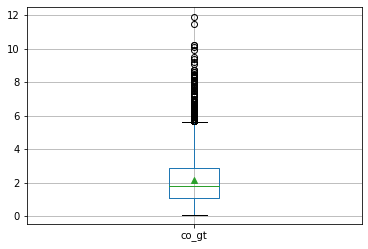

In [31]:
filt_df = try_df.boxplot(column=['co_gt'], showmeans=True)
filt_df.plot()

plt.show()

# pt08_s1_co

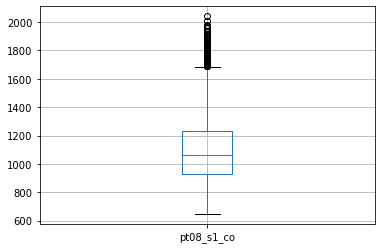

In [32]:
pt08s1_co = try_df.boxplot(column=['pt08_s1_co'])
pt08s1_co.plot()

plt.show()

# nmhc_gt

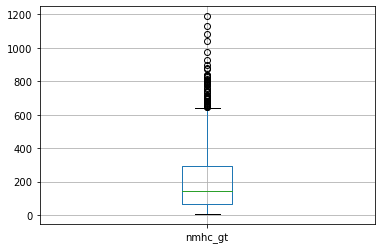

In [33]:
nmhc_gt = try_df.boxplot(column=['nmhc_gt'])
nmhc_gt.plot()

plt.show()

--> bereits bekannt, kann fallen gelassen werden 

# c6h6_gt

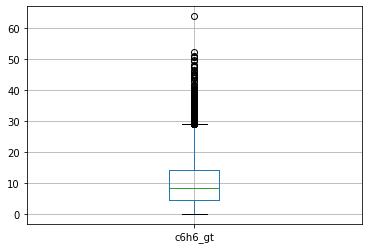

In [34]:
c6h6_gt = try_df.boxplot(column=['c6h6_gt'])
c6h6_gt.plot()

plt.show()

# pt08_s2_nmhc

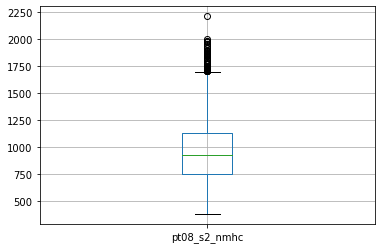

In [35]:
pt08_s2_nmhc= try_df.boxplot(column=['pt08_s2_nmhc'])
pt08_s2_nmhc.plot()

plt.show()

# nox_gt

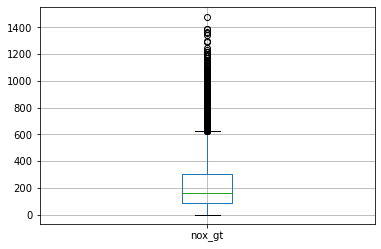

In [36]:
nox_gt = try_df.boxplot(column=['nox_gt'])
nox_gt.plot()

plt.show()

# pt08_s3_nox

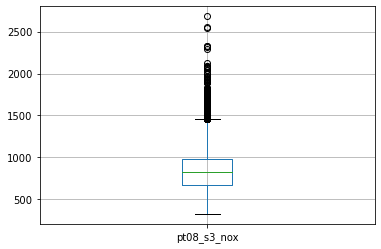

In [37]:
pt08_s3_nox = try_df.boxplot(column=['pt08_s3_nox'])
pt08_s3_nox.plot()

plt.show()

# no2_gt

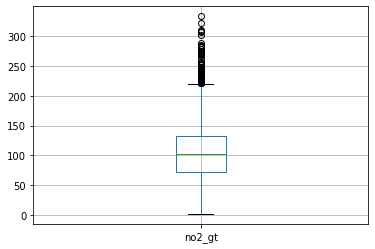

In [38]:
no2_gt  = try_df.boxplot(column=['no2_gt'])
no2_gt.plot()

plt.show()

# pt08_s4_no2

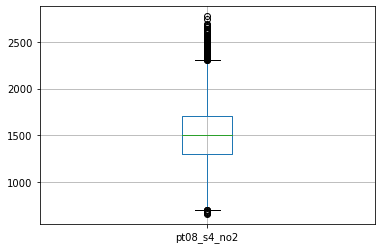

In [39]:
pt08_s4_no2 = try_df.boxplot(column=['pt08_s4_no2'])
pt08_s4_no2.plot()

plt.show()

# pt08_s5_o3

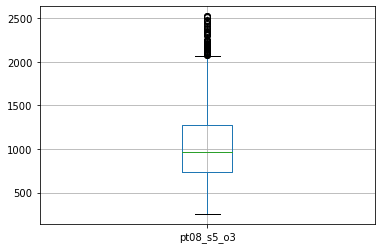

In [40]:
pt08_s5_o3 = try_df.boxplot(column=['pt08_s5_o3'])
pt08_s5_o3.plot()

plt.show()

# t

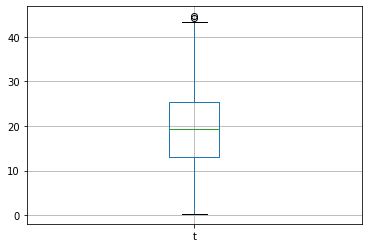

In [41]:
t = try_df.boxplot(column=['t'])
t.plot()

plt.show()

# rh

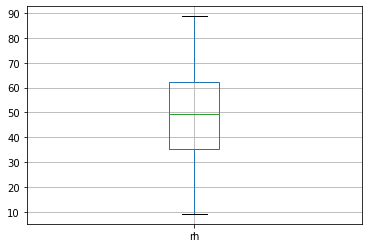

In [42]:
rh = try_df.boxplot(column=['rh'])
rh.plot()

plt.show()

# ah

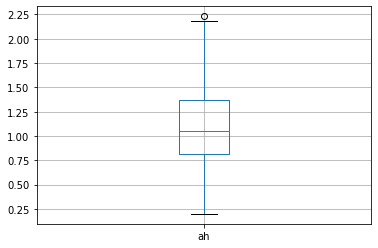

In [43]:
ah = try_df.boxplot(column=['ah'])
ah.plot()

plt.show()

# Plausible Min / Max hinzufügen 

In [44]:
# Dataframe für Plaus. Min/Max erstellen 
lst = [['0.1','647','0.1','749','0.1','204','0.1','702','253','0.3','9.2','0.1988'],
      ['5.6','1687','28.95','1701.5','625.875','1452','220.5','2310','2074.5','43.85','88.7','2.231']]

pmin = pd.DataFrame(lst, columns = ['co_gt','pt08_s1_co','c6h6_gt','pt08_s2_nmhc','nox_gt','pt08_s3_nox','no2_gt','pt08_s4_no2','pt08_s5_o3','t','rh','ah'], index = ['min', 'max'])

pmin

,co_gt,pt08_s1_co,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
min,0.1,647,0.1,749,0.1,204,0.1,702,253,0.3,9.2,0.1988
max,5.6,1687,28.95,1701.5,625.875,1452,220.5,2310,2074.5,43.85,88.7,2.231


In [45]:
pmin.to_csv('PlausMinMaxt.csv', sep = ';')

In [46]:
# Bisherige FL um Plaus. Min/Max ergänzen  
PlausFL= pd.concat([featureAna,pmin])
PlausFL

,co_gt,pt08_s1_co,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,6090.0,7709.0,7709.0,7709.0,6146.0,7709.0,6143.0,7709.0,7709.0,7709.0,7709.0,7709.0
mean,2.168604,1098.303412,10.458205,953.579453,232.360072,848.762615,106.251831,1507.352834,1024.200026,19.476041,48.969244,1.082099
std,1.46454,219.938457,7.580282,268.035911,209.976677,259.638998,44.739751,331.314334,393.937025,8.662273,17.286378,0.39465
amin,0.1,647.0,0.1,383.0,2.0,322.0,2.0,657.0,253.0,0.3,9.2,0.1988
25%,1.1,932.0,4.7,749.0,89.0,672.0,73.0,1305.0,737.0,13.1,35.5,0.8167
50%,1.8,1061.0,8.6,925.0,164.0,818.0,103.0,1508.0,962.0,19.3,49.4,1.0468
75%,2.9,1234.0,14.4,1130.0,303.75,984.0,132.0,1707.0,1272.0,25.4,62.1,1.3713
amax,11.9,2040.0,63.7,2214.0,1479.0,2683.0,333.0,2775.0,2523.0,44.6,88.7,2.231
min,0.1,647,0.1,749,0.1,204,0.1,702,253,0.3,9.2,0.1988
max,5.6,1687,28.95,1701.5,625.875,1452,220.5,2310,2074.5,43.85,88.7,2.231


In [47]:
# Unbenötigte Daten fallen lassen 
PlausFL.drop(['count','std'],axis = 0, inplace = True)

In [48]:
# DF rotieren 
PlausFL = PlausFL.transpose()

In [49]:
PlausFL = PlausFL.rename_axis('names')

In [50]:
PlausFL

,mean,amin,25%,50%,75%,amax,min,max
names,,,,,,,,
co_gt,2.168604,0.1,1.1,1.8,2.9,11.9,0.1,5.6
pt08_s1_co,1098.303412,647.0,932.0,1061.0,1234.0,2040.0,647,1687
c6h6_gt,10.458205,0.1,4.7,8.6,14.4,63.7,0.1,28.95
pt08_s2_nmhc,953.579453,383.0,749.0,925.0,1130.0,2214.0,749,1701.5
nox_gt,232.360072,2.0,89.0,164.0,303.75,1479.0,0.1,625.875
pt08_s3_nox,848.762615,322.0,672.0,818.0,984.0,2683.0,204,1452
no2_gt,106.251831,2.0,73.0,103.0,132.0,333.0,0.1,220.5
pt08_s4_no2,1507.352834,657.0,1305.0,1508.0,1707.0,2775.0,702,2310
pt08_s5_o3,1024.200026,253.0,737.0,962.0,1272.0,2523.0,253,2074.5


In [52]:
PlausFL.drop(['amin', 'amax'], axis = 1, inplace =True )

In [53]:
PlausFL

,mean,25%,50%,75%,min,max
names,,,,,,
co_gt,2.168604,1.1,1.8,2.9,0.1,5.6
pt08_s1_co,1098.303412,932.0,1061.0,1234.0,647,1687
c6h6_gt,10.458205,4.7,8.6,14.4,0.1,28.95
pt08_s2_nmhc,953.579453,749.0,925.0,1130.0,749,1701.5
nox_gt,232.360072,89.0,164.0,303.75,0.1,625.875
pt08_s3_nox,848.762615,672.0,818.0,984.0,204,1452
no2_gt,106.251831,73.0,103.0,132.0,0.1,220.5
pt08_s4_no2,1507.352834,1305.0,1508.0,1707.0,702,2310
pt08_s5_o3,1024.200026,737.0,962.0,1272.0,253,2074.5


In [54]:
PlausFL.to_csv('02_PlausFeatureList.csv', sep = ';')